# Homework 6: Commodities

## Basic imports and data manipulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HW6_Commodities_Data.xlsx to HW6_Commodities_Data.xlsx


In [3]:
path = r"/content/HW6_Commodities_Data.xlsx"
df = pd.read_excel(path,parse_dates=True,index_col='Date')

In [4]:
df

,Brernt(BNO),US OIL (USO),Gold(GLD),Silver (SLV)
Date,,,,
2016-11-01,13.860000,84.559998,122.730003,17.410000
2016-11-02,13.490000,82.239998,123.639999,17.559999
2016-11-03,13.280000,80.639999,124.300003,17.420000
2016-11-04,13.070000,79.839996,124.389999,17.459999
2016-11-07,13.270000,81.279999,122.150002,17.290001
...,...,...,...,...
2021-10-25,22.570000,57.830002,168.929993,22.740000
2021-10-26,22.760000,58.450001,167.679993,22.370001
2021-10-27,22.160000,56.900002,168.119995,22.290001


In [5]:
# Creating a separate dataframe for BNO and USO ETF prices
df_oil = df.iloc[:,:-2]
# Renaming the columns for convinience
df_oil = df_oil.rename({'Brernt(BNO)': 'BNO', 'US OIL (USO)': 'USO'}, axis=1)
# Storing the new dataframe for future use
df_oil.to_csv("./oil.csv")
# Displaying the new dataframe
df_oil

,BNO,USO
Date,,
2016-11-01,13.860000,84.559998
2016-11-02,13.490000,82.239998
2016-11-03,13.280000,80.639999
2016-11-04,13.070000,79.839996
2016-11-07,13.270000,81.279999
...,...,...
2021-10-25,22.570000,57.830002
2021-10-26,22.760000,58.450001
2021-10-27,22.160000,56.900002


In [6]:
# Creating a separate dataframe for GLD and SLV ETF prices
df_gs = df.iloc[:,2:]
# Renaming the columns for convinience
df_gs = df_gs.rename({'Gold(GLD)': 'GLD', 'Silver (SLV)': 'SLV'}, axis=1)
# Storing the new dataframe for future use
df_gs.to_csv("./gs.csv")
# Displaying the new dataframe
df_gs

,GLD,SLV
Date,,
2016-11-01,122.730003,17.410000
2016-11-02,123.639999,17.559999
2016-11-03,124.300003,17.420000
2016-11-04,124.389999,17.459999
2016-11-07,122.150002,17.290001
...,...,...
2021-10-25,168.929993,22.740000
2021-10-26,167.679993,22.370001
2021-10-27,168.119995,22.290001


## Backtesting Brent Oil vs US Oil Strategy

### Plot Time Series Data

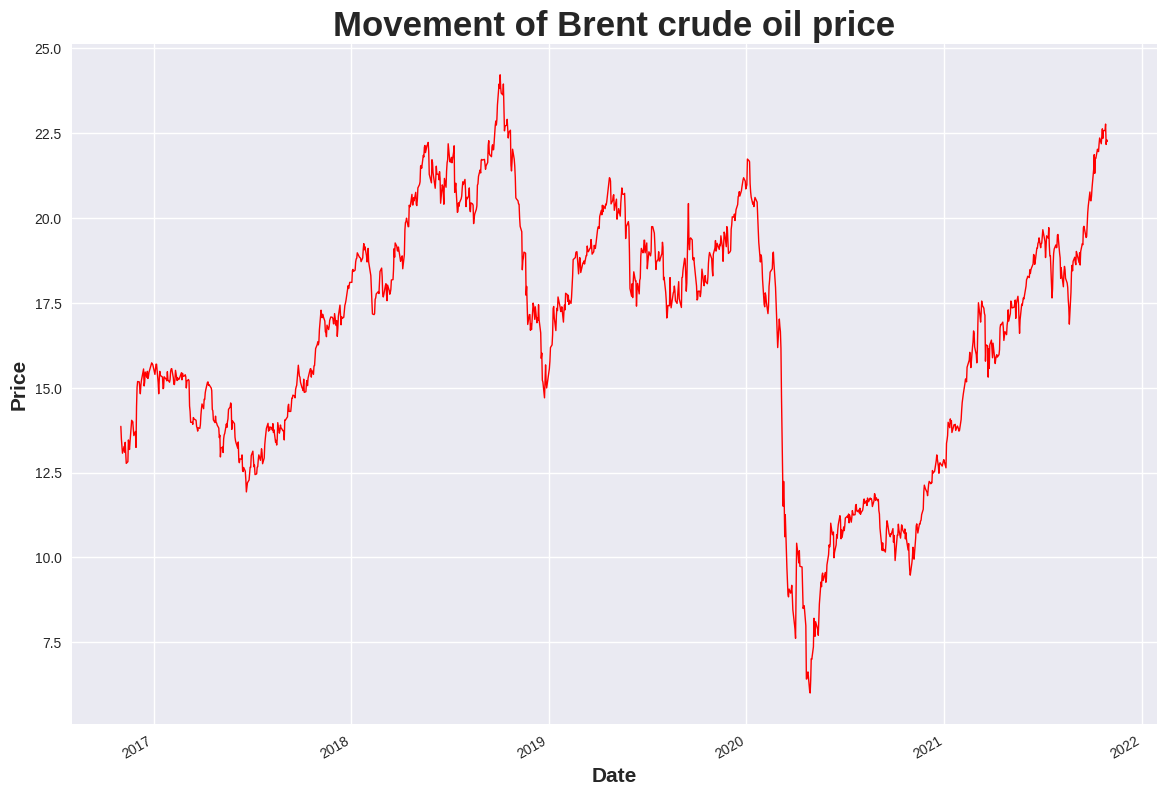

In [7]:
# Plot BNO time series data
plt.figure(figsize=(14, 10), dpi=100)
plt.style.use("seaborn")
df_oil["BNO"].plot(color = "red", linewidth = 1)
plt.title("Movement of Brent crude oil price",fontweight='bold',fontsize = 25)
plt.xlabel("Date",fontweight='bold',fontsize = 15)
plt.ylabel("Price",fontweight='bold',fontsize = 15)
plt.savefig('./bno.png', bbox_inches='tight')
plt.show()

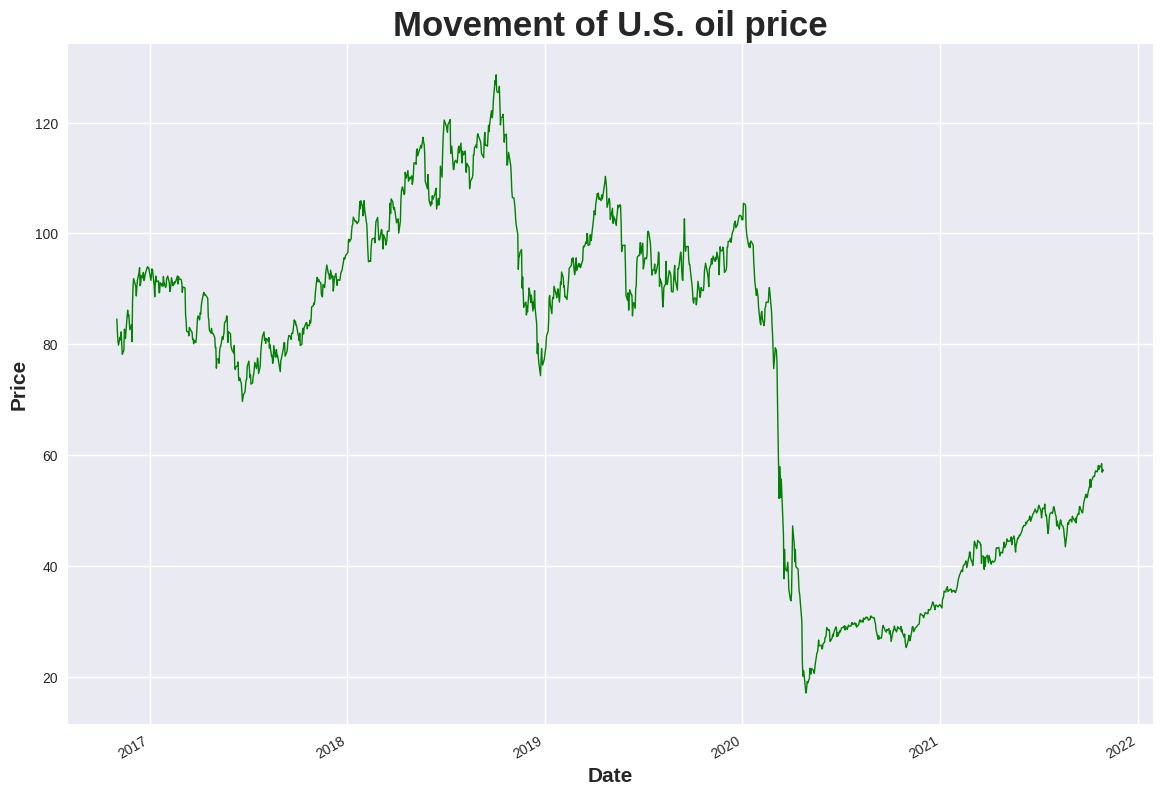

In [8]:

plt.figure(figsize=(14, 10), dpi=100)
plt.style.use("seaborn")
df_oil["USO"].plot(color = "green", linewidth = 1)
plt.title("Movement of U.S. oil price",fontweight='bold',fontsize = 25)
plt.xlabel("Date",fontweight='bold',fontsize = 15)
plt.ylabel("Price",fontweight='bold',fontsize = 15)
plt.savefig('./uso.png', bbox_inches='tight')
plt.show()

### Plot Combined Time Series Data of Brent and US Oil Price

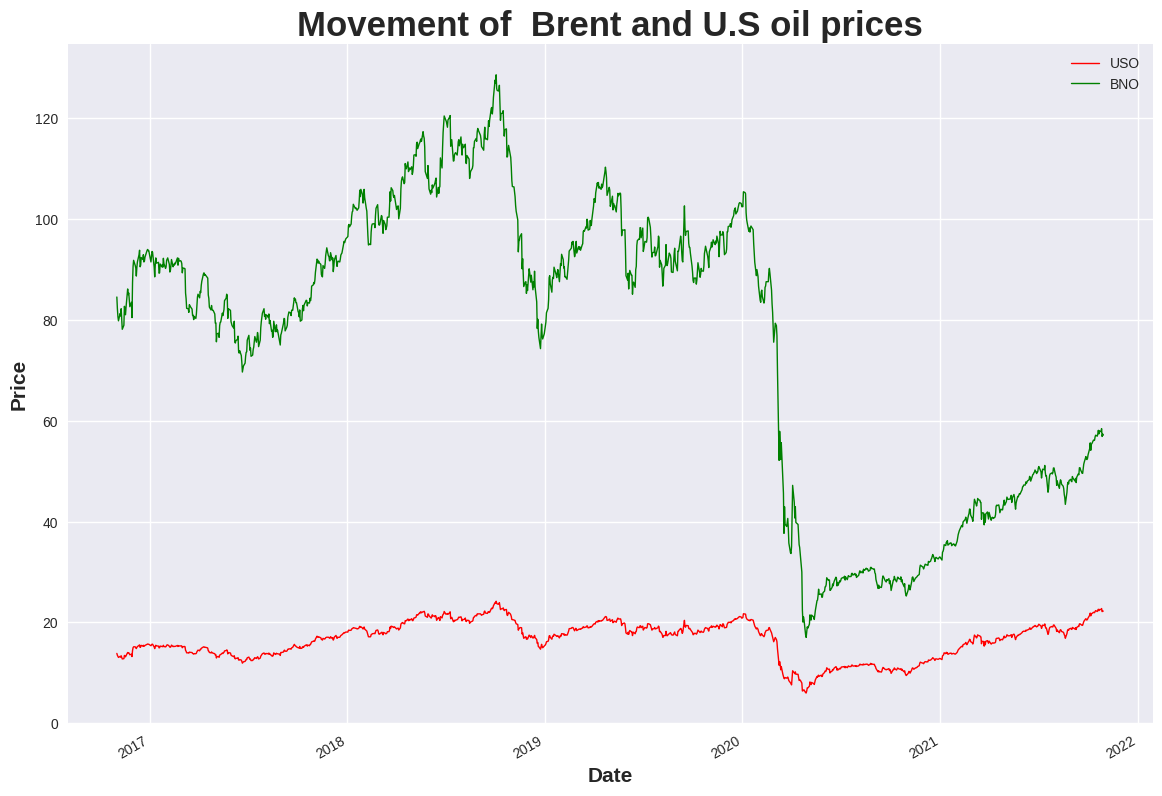

In [13]:
plt.figure(figsize=(14, 10), dpi=100)
plt.style.use("seaborn")
df_oil["BNO"].plot(label = "USO",color = "red", linewidth = 1)
df_oil["USO"].plot(label = "BNO", color = "green", linewidth = 1)
plt.title("Movement of  Brent and U.S oil prices",fontweight='bold',fontsize = 25)
plt.xlabel("Date",fontweight='bold',fontsize = 15)
plt.ylabel("Price",fontweight='bold',fontsize = 15)
plt.legend()
plt.savefig('./uso_bno.png', bbox_inches='tight')
plt.show()

### Compute 20 period Moving Averages


In [9]:
df_oil["MA20_BNO"] = df_oil["BNO"].rolling(20).mean()
df_oil["MA20_USO"] = df_oil["USO"].rolling(20).mean()
df_oil.iloc[0:21]

,BNO,USO,MA20_BNO,MA20_USO
Date,,,,
2016-11-01,13.86,84.559998,NaN,NaN
2016-11-02,13.49,82.239998,NaN,NaN
2016-11-03,13.28,80.639999,NaN,NaN
2016-11-04,13.07,79.839996,NaN,NaN
2016-11-07,13.27,81.279999,NaN,NaN
2016-11-08,13.10,80.800003,NaN,NaN
2016-11-09,13.39,82.239998,NaN,NaN
2016-11-10,13.08,80.320000,NaN,NaN
2016-11-11,12.77,78.160004,NaN,NaN


### Plot Smoothened Time Series data for BNO and USO

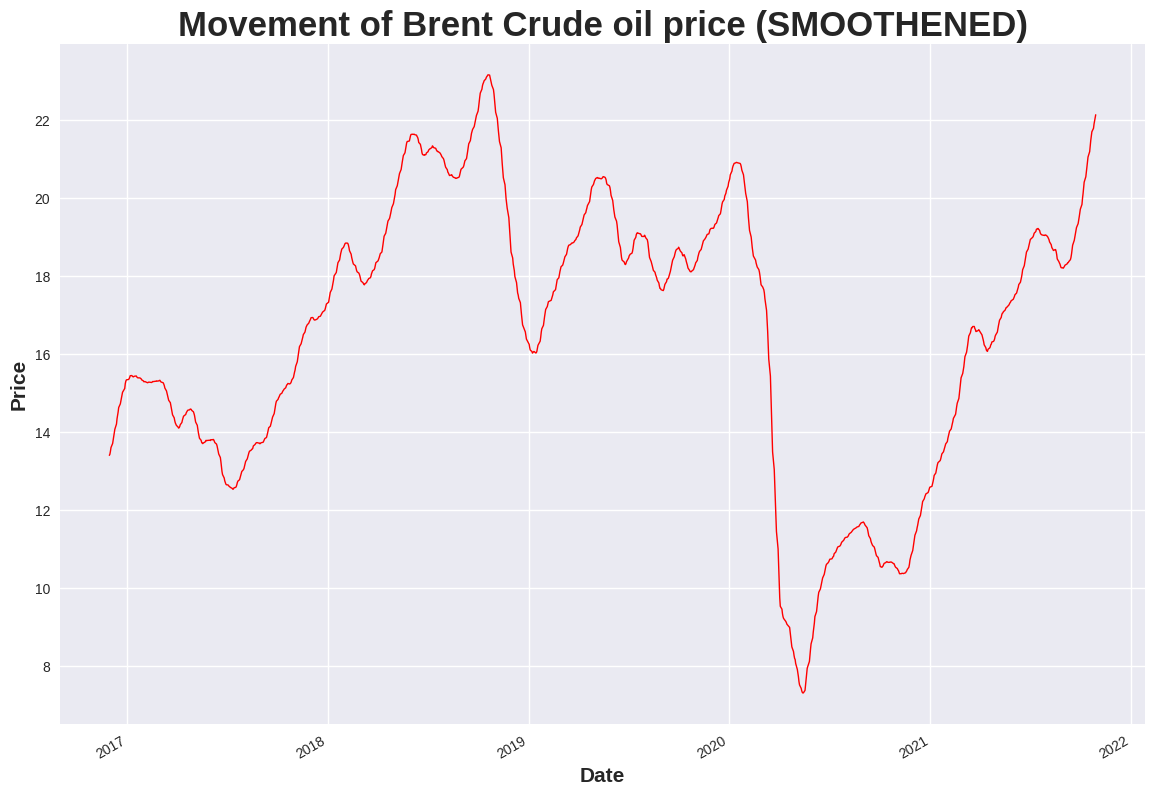

In [10]:
# Plot smoothened BNO time series data
plt.figure(figsize=(14, 10), dpi=100)
plt.style.use("seaborn")
df_oil["MA20_BNO"].plot(color = "red", linewidth = 1)
plt.title("Movement of Brent Crude oil price (SMOOTHENED)",fontweight='bold',fontsize = 25)
plt.xlabel("Date",fontweight='bold',fontsize = 15)
plt.ylabel("Price",fontweight='bold',fontsize = 15)
plt.savefig('./bno_ma20.png', bbox_inches='tight')
plt.show()

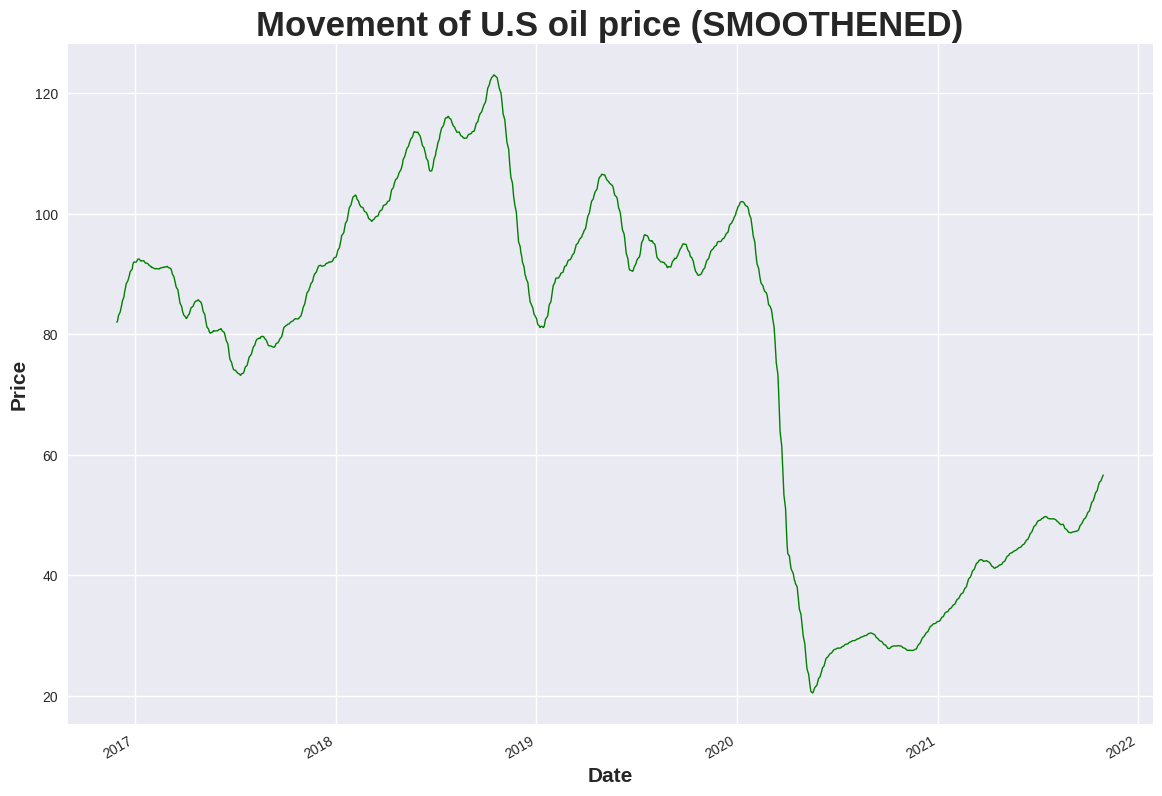

In [11]:
# Plot USO time series data
plt.figure(figsize=(14, 10), dpi=100)
plt.style.use("seaborn")
df_oil["MA20_USO"].plot(color = "green", linewidth = 1)
plt.title("Movement of U.S oil price (SMOOTHENED)",fontweight='bold',fontsize = 25)
plt.xlabel("Date",fontweight='bold',fontsize = 15)
plt.ylabel("Price",fontweight='bold',fontsize = 15)
plt.savefig('./uso_ma20.png', bbox_inches='tight')
plt.show()

### Plot Combined Time Series Data (Smoothened) of Brent and US Oil Price

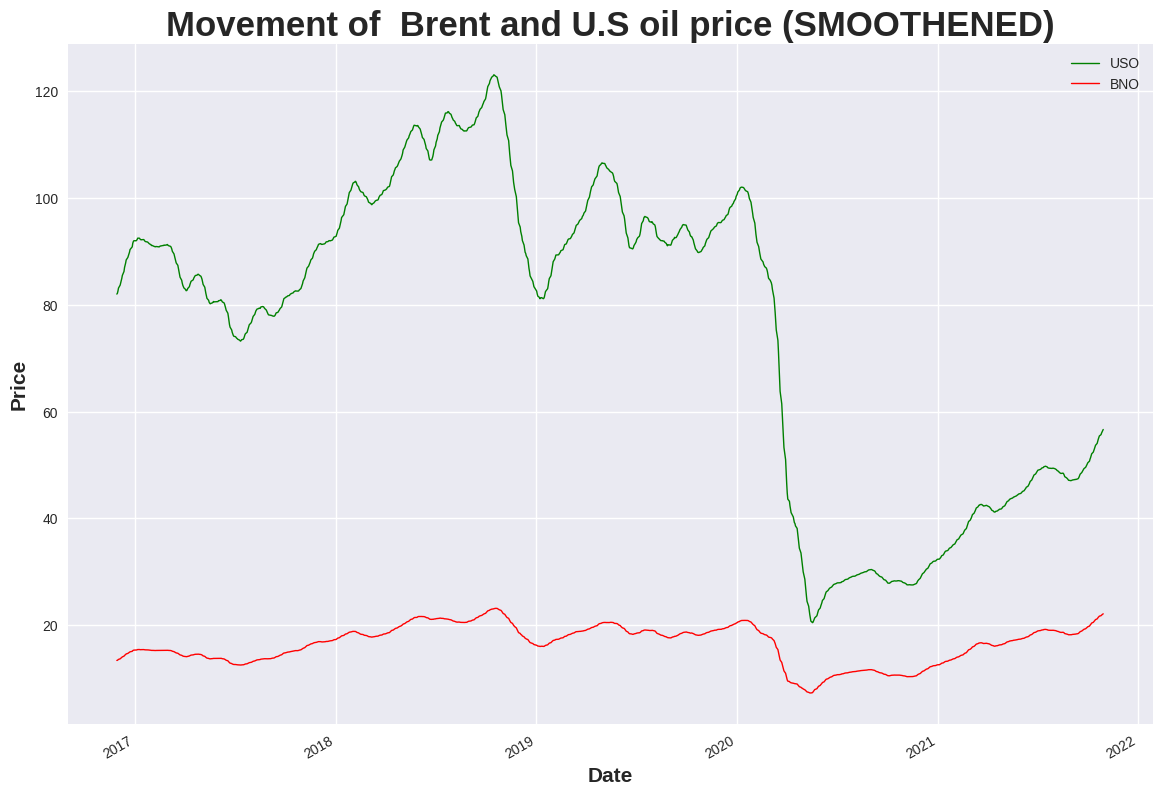

In [12]:
plt.figure(figsize=(14, 10), dpi=100)
plt.style.use("seaborn")
df_oil["MA20_USO"].plot(label = "USO", color = "green", linewidth = 1)
df_oil["MA20_BNO"].plot(label = "BNO",  color = "red", linewidth = 1)
plt.title("Movement of  Brent and U.S oil price (SMOOTHENED)",fontweight='bold',fontsize = 25)
plt.xlabel("Date",fontweight='bold',fontsize = 15)
plt.ylabel("Price",fontweight='bold',fontsize = 15)
plt.legend()
plt.savefig('./uso_bno_ma20.png', bbox_inches='tight')
plt.show()

### Obtain the daily values of $\frac{BNO(n)}{USO(n)}$ and $k$

In [14]:
df_oil["BNO/USO"] = df_oil["BNO"]/df_oil["USO"]
df_oil["k"] = df_oil["BNO/USO"].rolling(20).mean()
df_oil.iloc[0:21]

,BNO,USO,MA20_BNO,MA20_USO,BNO/USO,k
Date,,,,,,
2016-11-01,13.86,84.559998,NaN,NaN,0.163907,NaN
2016-11-02,13.49,82.239998,NaN,NaN,0.164032,NaN
2016-11-03,13.28,80.639999,NaN,NaN,0.164683,NaN
2016-11-04,13.07,79.839996,NaN,NaN,0.163702,NaN
2016-11-07,13.27,81.279999,NaN,NaN,0.163263,NaN
2016-11-08,13.10,80.800003,NaN,NaN,0.162129,NaN
2016-11-09,13.39,82.239998,NaN,NaN,0.162816,NaN
2016-11-10,13.08,80.320000,NaN,NaN,0.162849,NaN
2016-11-11,12.77,78.160004,NaN,NaN,0.163383,NaN


### Predict Daily Position

In [15]:
# Conditions for Trading Strategy
conditions = [df_oil['BNO/USO'] > df_oil['k'], 
              df_oil['BNO/USO'] < df_oil['k']]

# Corresponding Action to be taken
choices = ['BNO_S_USO_L', 'BNO_L_USO_S']

# New Column for Trading Startegy
df_oil['Pos'] = np.select(conditions, choices, default='No_Position')

In [16]:
df_oil[17:]

,BNO,USO,MA20_BNO,MA20_USO,BNO/USO,k,Pos
Date,,,,,,,
2016-11-25,13.590000,82.639999,NaN,NaN,0.164448,NaN,No_Position
2016-11-28,13.710000,83.519997,NaN,NaN,0.164152,NaN,No_Position
2016-11-29,13.240000,80.480003,13.4020,82.020000,0.164513,0.163394,BNO_S_USO_L
2016-11-30,14.440000,87.440002,13.4310,82.164000,0.165142,0.163456,BNO_S_USO_L
2016-12-01,15.010000,90.639999,13.5070,82.584000,0.165600,0.163535,BNO_S_USO_L
...,...,...,...,...,...,...,...
2021-10-25,22.570000,57.830002,21.7895,55.691500,0.390282,0.391287,BNO_L_USO_S
2021-10-26,22.760000,58.450001,21.9020,55.994000,0.389393,0.391186,BNO_L_USO_S
2021-10-27,22.160000,56.900002,21.9850,56.223000,0.389455,0.391068,BNO_L_USO_S


### Compute Daily Profit or Loss  

In [17]:
conditions = [df_oil['Pos'].shift(1) ==  "BNO_S_USO_L", 
              df_oil['Pos'].shift(1) == "BNO_L_USO_S"]

choice_a  = df_oil['BNO'].shift(1)-df_oil['BNO'] + df_oil["k"].shift(1)*(df_oil['USO']-df_oil['USO'].shift(1))
choice_b  = df_oil['BNO']-df_oil['BNO'].shift(1) + df_oil["k"].shift(1)*(df_oil['USO'].shift(1)-df_oil['USO'])

choices = [choice_a,choice_b ]


df_oil['Profit/Loss'] = np.select(conditions, choices, default='0')
df_oil['Profit/Loss'] = df_oil['Profit/Loss'].astype(float)

In [18]:
df_oil.iloc[18:]

,BNO,USO,MA20_BNO,MA20_USO,BNO/USO,k,Pos,Profit/Loss
Date,,,,,,,,
2016-11-28,13.710000,83.519997,NaN,NaN,0.164152,NaN,No_Position,0.000000
2016-11-29,13.240000,80.480003,13.4020,82.020000,0.164513,0.163394,BNO_S_USO_L,0.000000
2016-11-30,14.440000,87.440002,13.4310,82.164000,0.165142,0.163456,BNO_S_USO_L,-0.062775
2016-12-01,15.010000,90.639999,13.5070,82.584000,0.165600,0.163535,BNO_S_USO_L,-0.046941
2016-12-02,15.180000,91.839996,13.6020,83.144000,0.165287,0.163565,BNO_S_USO_L,0.026241
...,...,...,...,...,...,...,...,...
2021-10-25,22.570000,57.830002,21.7895,55.691500,0.390282,0.391287,BNO_L_USO_S,0.078277
2021-10-26,22.760000,58.450001,21.9020,55.994000,0.389393,0.391186,BNO_L_USO_S,-0.052598
2021-10-27,22.160000,56.900002,21.9850,56.223000,0.389455,0.391068,BNO_L_USO_S,0.006338


### Verification of strategy for Case 1: Short BNO, Long USO

In [19]:
df_oil.loc["2016-11-29":"2016-11-30"]

,BNO,USO,MA20_BNO,MA20_USO,BNO/USO,k,Pos,Profit/Loss
Date,,,,,,,,
2016-11-29,13.24,80.480003,13.402,82.020,0.164513,0.163394,BNO_S_USO_L,0.000000
2016-11-30,14.44,87.440002,13.431,82.164,0.165142,0.163456,BNO_S_USO_L,-0.062775




On 2016-11-29,

- $\frac{BNO}{USO} = 0.164513$
- $k = 0.165142$
- Hence $\frac{BNO}{USO} > k$
- Strategy:
    - Short 1 unit of BNO and Go long k unit of USO on 2016-11-29 i.e.sell $1$ unit of BNO at $13.24$ and Buy $0.165142$ units of USO at $80.480003$.
    - Close position next day i.e. on 2016-11-30 sell $0.165142$ units of USO at the price of $87.440002$ and buy 1 unit of BNO at $14.44$
- Profit/Loss =  $0.163394*(87.440002-80.480003) +  (13.24-14.44)$ = $-0.0627779$ (ignore slight decimal changes due to format)

### Verification of strategy for Case 2: Long BNO, Short USO

In [20]:
df_oil.loc["2021-10-25":"2021-10-26"]

,BNO,USO,MA20_BNO,MA20_USO,BNO/USO,k,Pos,Profit/Loss
Date,,,,,,,,
2021-10-25,22.57,57.830002,21.7895,55.6915,0.390282,0.391287,BNO_L_USO_S,0.078277
2021-10-26,22.76,58.450001,21.9020,55.9940,0.389393,0.391186,BNO_L_USO_S,-0.052598


On 2021-10-25,

- $\frac{BNO}{USO} = 0.390282$
- $k = 0.391287$
- Hence $\frac{BNO}{USO} < k$
- Strategy:
    - Long 1 unit of  BNO and go short $k$ units of USO  i.e. Buy $1$ unit of BNO at $22.57$ and sell $0.391287$ units of USO at $57.830002$.
    - Close position next day i.e. on 2021-10-26 sell 1 unit of BNO  at the price of $22.76$ and buy $0.391287$ units of USO at $58.450001$.	
- Profit/Loss =  $(22.76 - 22.57)  + 0.391287*(57.830002 - 58.450001) $ = $-0.0525905$ (ignore slight decimal changes due to format)

### Final Profit/Loss

In [21]:
print(f"Final Profit/Loss: {df_oil['Profit/Loss'].sum()}")

Final Profit/Loss: -2.569365042761527


### Maximum one day drawdown of the strategy

In [22]:
max_draw = df_oil['Profit/Loss'].min()
print(f"Maximum Drawdown = {max_draw}")

Maximum Drawdown = -0.5841536144937245


### Maximum one day return of the strategy

In [23]:
max_return = df_oil['Profit/Loss'].max()
print(f"Maximum Return = {max_return}")

Maximum Return = 1.2686328215392113


### Saving the final file

In [24]:
df_oil.to_csv("./oil_stat.csv")

## Backtesting Gold vs Silver strategy

### Plot Time Series Data

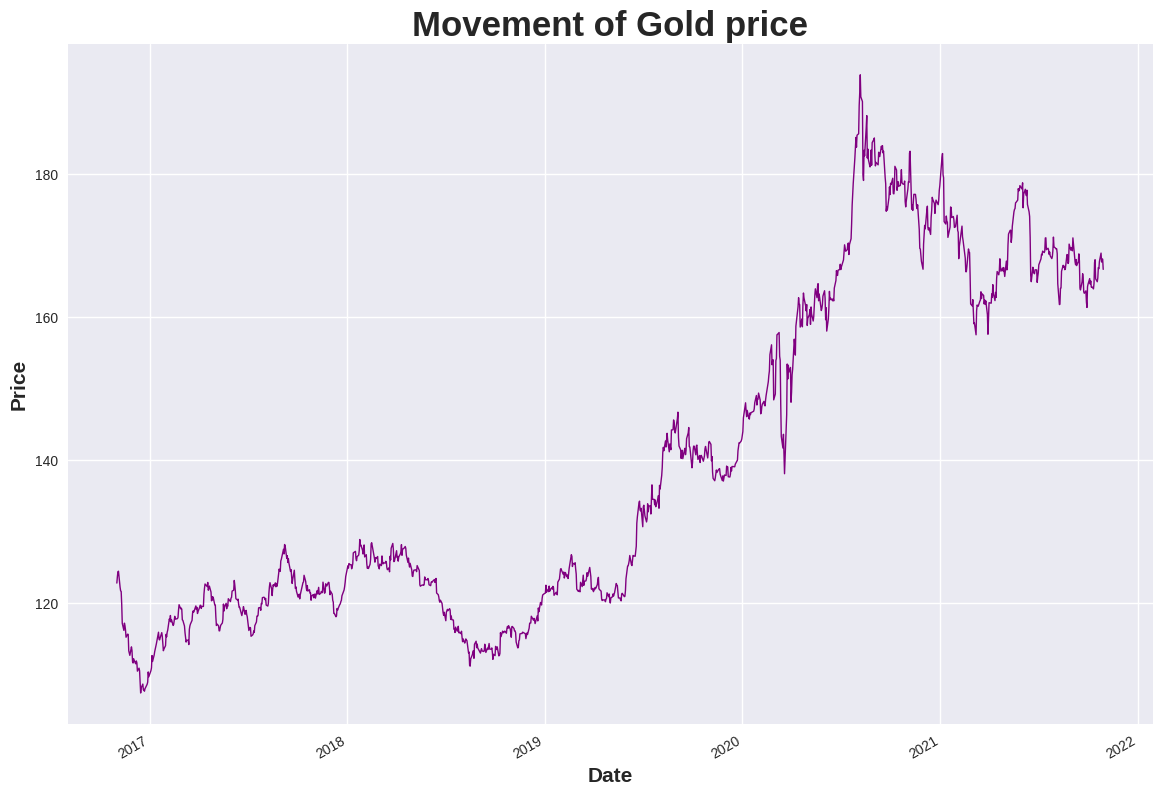

In [ ]:
# Plot GLD time series data
plt.figure(figsize=(14, 10), dpi=100)
plt.style.use("seaborn")
df_gs["GLD"].plot(color = "purple", linewidth = 1)
plt.title("Movement of Gold price",fontweight='bold',fontsize = 25)
plt.xlabel("Date",fontweight='bold',fontsize = 15)
plt.ylabel("Price",fontweight='bold',fontsize = 15)
plt.savefig('./gld.png', bbox_inches='tight')
plt.show()

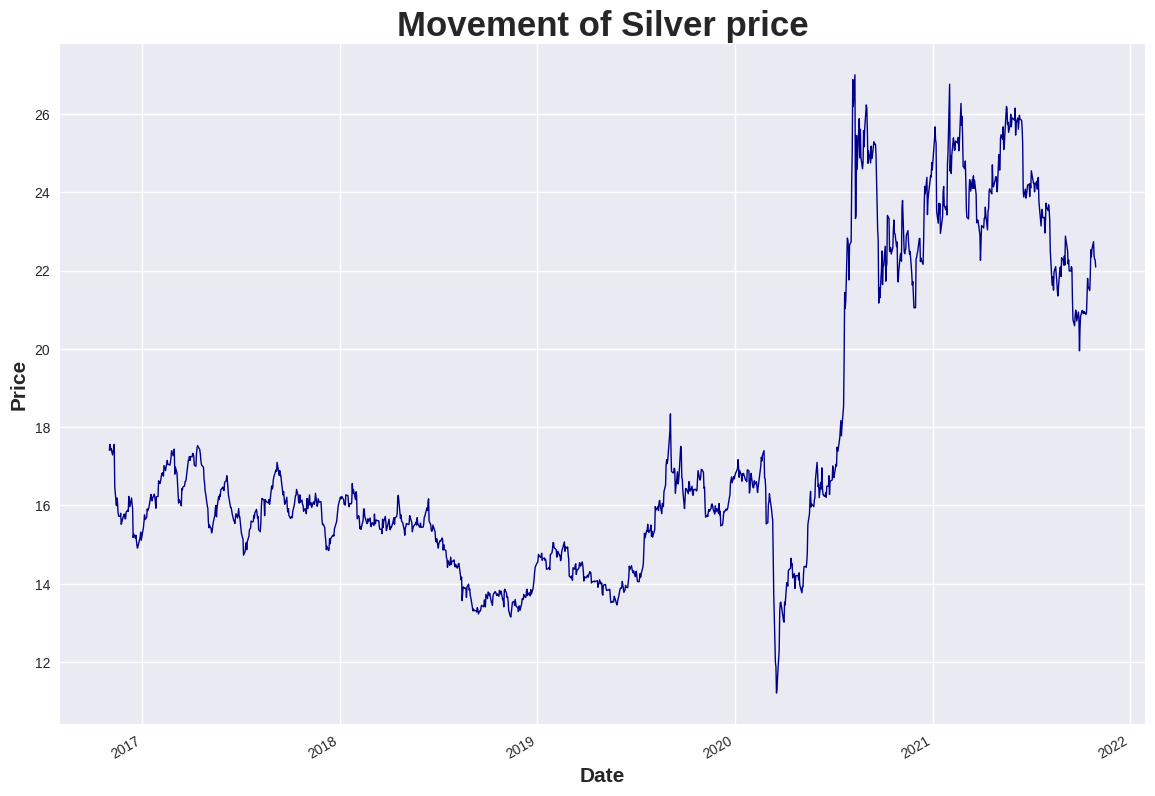

In [27]:
# Plot SLV time series data
plt.figure(figsize=(14, 10), dpi=100)
plt.style.use("seaborn")
df_gs["SLV"].plot(color = "darkblue", linewidth = 1)
plt.title("Movement of Silver price",fontweight='bold',fontsize = 25)
plt.xlabel("Date",fontweight='bold',fontsize = 15)
plt.ylabel("Price",fontweight='bold',fontsize = 15)
plt.savefig('./slv.png', bbox_inches='tight')
plt.show()

### Plot combined time series data of Gold and Silver Prices

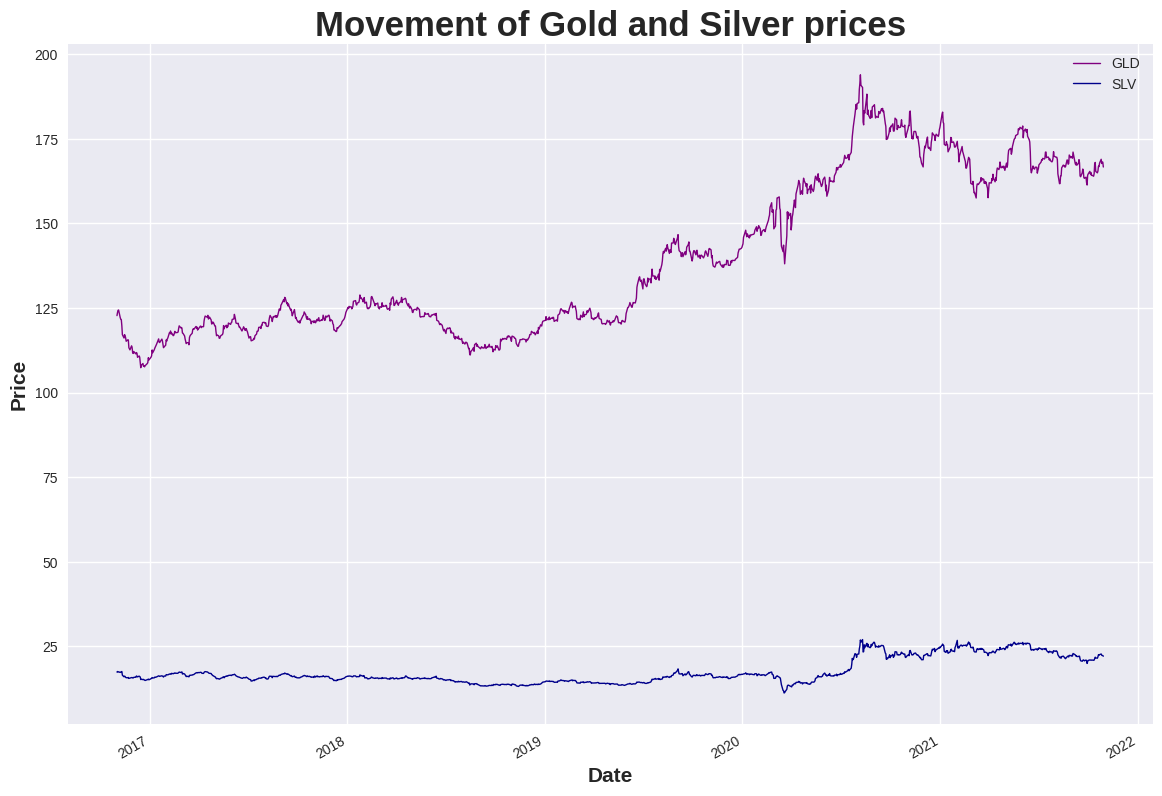

In [33]:
plt.figure(figsize=(14, 10), dpi=100)
plt.style.use("seaborn")
df_gs["GLD"].plot(label = "GLD", color = "purple", linewidth = 1)
df_gs["SLV"].plot(label = "SLV",  color = "darkblue", linewidth = 1)
plt.title("Movement of Gold and Silver prices",fontweight='bold',fontsize = 25)
plt.xlabel("Date",fontweight='bold',fontsize = 15)
plt.ylabel("Price",fontweight='bold',fontsize = 15)
plt.legend()
plt.savefig('./gld_slv.png', bbox_inches='tight')
plt.show()

### Compute 20 period Moving Average

In [28]:
df_gs["MA20_GLD"] = df_gs["GLD"].rolling(20).mean()
df_gs["MA20_SLV"] = df_gs["SLV"].rolling(20).mean()
df_gs.iloc[0:21]

,GLD,SLV,MA20_GLD,MA20_SLV
Date,,,,
2016-11-01,122.730003,17.410000,NaN,NaN
2016-11-02,123.639999,17.559999,NaN,NaN
2016-11-03,124.300003,17.420000,NaN,NaN
2016-11-04,124.389999,17.459999,NaN,NaN
2016-11-07,122.150002,17.290001,NaN,NaN
2016-11-08,121.639999,17.400000,NaN,NaN
2016-11-09,121.559998,17.450001,NaN,NaN
2016-11-10,119.750000,17.559999,NaN,NaN
2016-11-11,117.099998,16.469999,NaN,NaN


### Plot Smoothened Time Series data for GLD and SLV

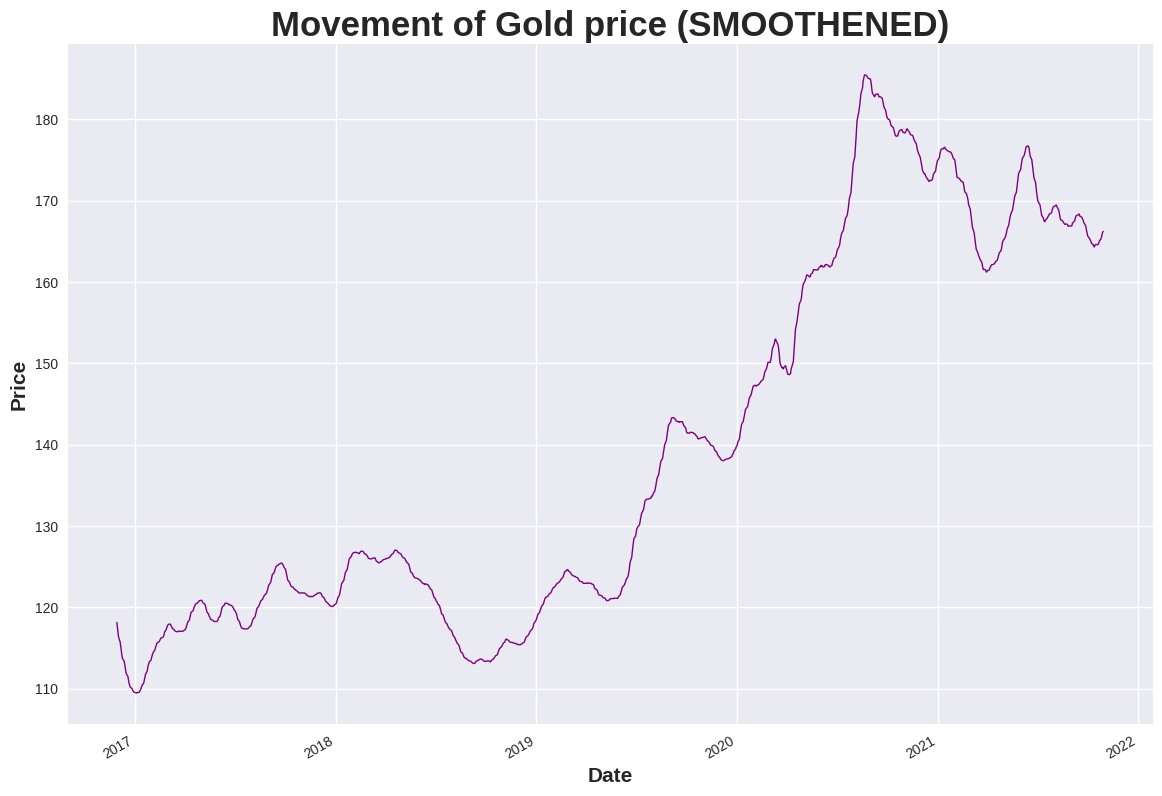

In [29]:
# Plot smoothened GLD time series data
plt.figure(figsize=(14, 10), dpi=100)
plt.style.use("seaborn")
df_gs["MA20_GLD"].plot(color = "purple", linewidth = 1)
plt.title("Movement of Gold price (SMOOTHENED)",fontweight='bold',fontsize = 25)
plt.xlabel("Date",fontweight='bold',fontsize = 15)
plt.ylabel("Price",fontweight='bold',fontsize = 15)
plt.savefig('./gld_ma20.png', bbox_inches='tight')
plt.show()

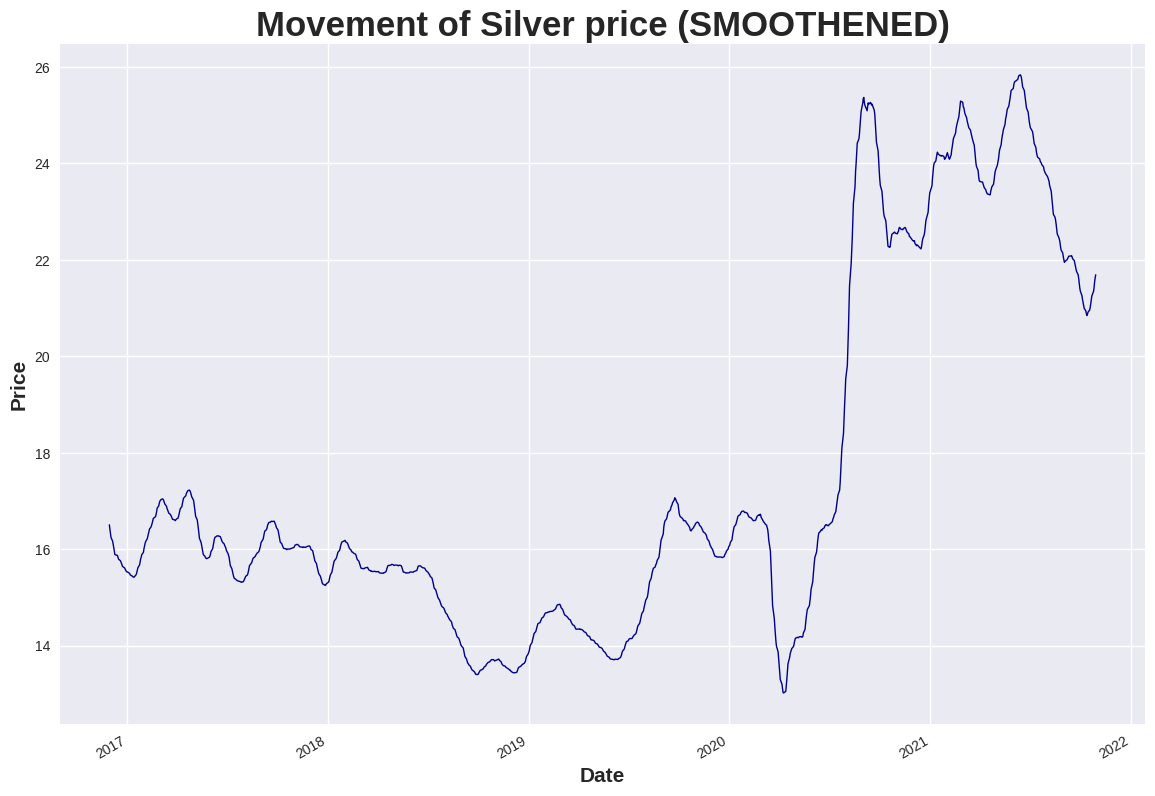

In [31]:
# Plot smoothened SLV time series data
plt.figure(figsize=(14, 10), dpi=100)
plt.style.use("seaborn")
df_gs["MA20_SLV"].plot(color = "darkblue", linewidth = 1)
plt.title("Movement of Silver price (SMOOTHENED)",fontweight='bold',fontsize = 25)
plt.xlabel("Date",fontweight='bold',fontsize = 15)
plt.ylabel("Price",fontweight='bold',fontsize = 15)
plt.savefig('./slv_ma20.png', bbox_inches='tight')
plt.show()

### Comparitive movement of GLD and SLV Price

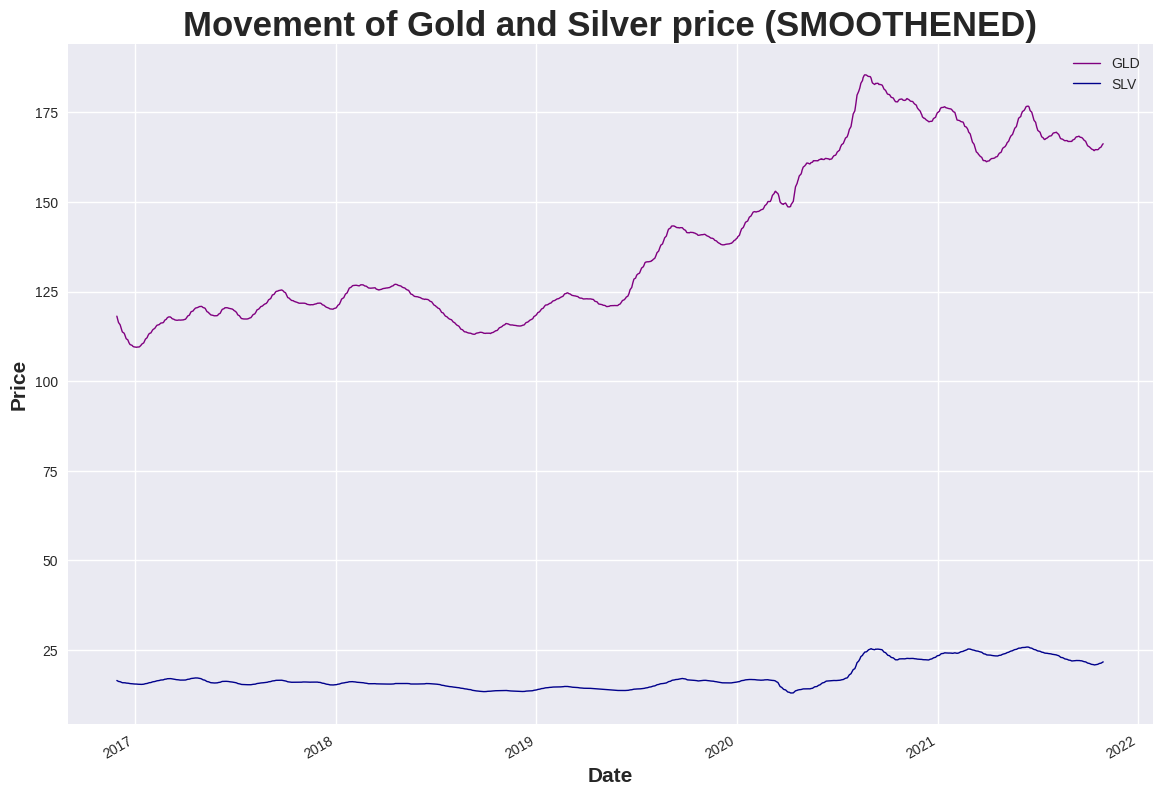

In [32]:
plt.figure(figsize=(14, 10), dpi=100)
plt.style.use("seaborn")
df_gs["MA20_GLD"].plot(label = "GLD", color = "purple", linewidth = 1)
df_gs["MA20_SLV"].plot(label = "SLV",  color = "darkblue", linewidth = 1)
plt.title("Movement of Gold and Silver price (SMOOTHENED)",fontweight='bold',fontsize = 25)
plt.xlabel("Date",fontweight='bold',fontsize = 15)
plt.ylabel("Price",fontweight='bold',fontsize = 15)
plt.legend()
plt.savefig('./gld_slv_ma20.png', bbox_inches='tight')
plt.show()

### Obtain the daily values of $\frac{GLD(n)}{SLV(n)}$ and $k$

In [34]:
df_gs["GLD/SLV"] = df_gs["GLD"]/df_gs["SLV"]
df_gs["k"] = df_gs["GLD/SLV"].rolling(20).mean()
df_gs.iloc[0:21]

,GLD,SLV,MA20_GLD,MA20_SLV,GLD/SLV,k
Date,,,,,,
2016-11-01,122.730003,17.410000,NaN,NaN,7.049397,NaN
2016-11-02,123.639999,17.559999,NaN,NaN,7.041003,NaN
2016-11-03,124.300003,17.420000,NaN,NaN,7.135477,NaN
2016-11-04,124.389999,17.459999,NaN,NaN,7.124284,NaN
2016-11-07,122.150002,17.290001,NaN,NaN,7.064777,NaN
2016-11-08,121.639999,17.400000,NaN,NaN,6.990805,NaN
2016-11-09,121.559998,17.450001,NaN,NaN,6.966189,NaN
2016-11-10,119.750000,17.559999,NaN,NaN,6.819476,NaN
2016-11-11,117.099998,16.469999,NaN,NaN,7.109897,NaN


### Predict Daily Position

In [35]:
# Conditions for Trading Strategy
conditions = [df_gs["GLD/SLV"] > df_gs['k'], 
              df_gs["GLD/SLV"] < df_gs['k']]

# Corresponding Action to be taken
choices = ['GLD_S_SLV_L', 'GLD_L_SLV_S']

# New Column for Trading Startegy
df_gs['Pos'] = np.select(conditions, choices, default='No_Position')

In [36]:
df_gs[17:]

,GLD,SLV,MA20_GLD,MA20_SLV,GLD/SLV,k,Pos
Date,,,,,,,
2016-11-25,112.610001,15.630000,NaN,NaN,7.204735,NaN,No_Position
2016-11-28,113.800003,15.770000,NaN,NaN,7.216234,NaN,No_Position
2016-11-29,113.269997,15.780000,118.131500,16.5045,7.178073,7.163255,GLD_S_SLV_L
2016-11-30,111.750000,15.660000,117.582500,16.4170,7.136015,7.167586,GLD_L_SLV_S
2016-12-01,111.540001,15.660000,116.977500,16.3220,7.122605,7.171666,GLD_L_SLV_S
...,...,...,...,...,...,...,...
2021-10-25,168.929993,22.740000,165.288499,21.3425,7.428760,7.751070,GLD_L_SLV_S
2021-10-26,167.679993,22.370001,165.569999,21.4220,7.495753,7.735940,GLD_L_SLV_S
2021-10-27,168.119995,22.290001,165.909998,21.5390,7.542395,7.708749,GLD_L_SLV_S


### Compute Daily Profit or Loss

In [37]:
conditions = [df_gs['Pos'].shift(1) ==  "GLD_S_SLV_L", 
              df_gs['Pos'].shift(1) == "GLD_L_SLV_S"]

choice_a  = df_gs['GLD'].shift(1)-df_gs['GLD'] + df_gs["k"].shift(1)*(df_gs['SLV']-df_gs['SLV'].shift(1))
choice_b  = df_gs['GLD']-df_gs['GLD'].shift(1) + df_gs["k"].shift(1)*(df_gs['SLV'].shift(1)-df_gs['SLV'])

choices = [choice_a,choice_b ]


df_gs['Profit/Loss'] = np.select(conditions, choices, default='0')
df_gs['Profit/Loss'] = df_gs['Profit/Loss'].astype(float)

In [38]:
df_gs.iloc[18:]

,GLD,SLV,MA20_GLD,MA20_SLV,GLD/SLV,k,Pos,Profit/Loss
Date,,,,,,,,
2016-11-28,113.800003,15.770000,NaN,NaN,7.216234,NaN,No_Position,0.000000
2016-11-29,113.269997,15.780000,118.131500,16.5045,7.178073,7.163255,GLD_S_SLV_L,0.000000
2016-11-30,111.750000,15.660000,117.582500,16.4170,7.136015,7.167586,GLD_L_SLV_S,0.660406
2016-12-01,111.540001,15.660000,116.977500,16.3220,7.122605,7.171666,GLD_L_SLV_S,-0.209999
2016-12-02,112.139999,15.830000,116.369500,16.2425,7.084018,7.169093,GLD_L_SLV_S,-0.619185
...,...,...,...,...,...,...,...,...
2021-10-25,168.929993,22.740000,165.288499,21.3425,7.428760,7.751070,GLD_L_SLV_S,-0.394077
2021-10-26,167.679993,22.370001,165.569999,21.4220,7.495753,7.735940,GLD_L_SLV_S,1.617888
2021-10-27,168.119995,22.290001,165.909998,21.5390,7.542395,7.708749,GLD_L_SLV_S,1.058877


### Final Profit/Loss

In [39]:
print(f"Final Profit/Loss: {df_gs['Profit/Loss'].sum()}")

Final Profit/Loss: -61.59156367342949


### Maximum one drawdown of the strategy

In [40]:
print(f"Maximum Drawdown = {df_gs['Profit/Loss'].min()}")

Maximum Drawdown = -14.558108489526212


### Maximum one day return of the strategy

In [41]:
print(f"Maximum Return = {df_gs['Profit/Loss'].max()}")

Maximum Return = 20.414567654592528
